## 데이터 EDA_거주인구 데이터

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# font 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
# 거주인구 데이터 불러오기
res_df = pd.read_csv('03_거주인구_RESIDENT_POP.csv',encoding='cp949')
res_df.info()
res_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   base_year      3612 non-null   int64 
 1   base_month     3612 non-null   int64 
 2   city           3612 non-null   object
 3   emd_cd         3612 non-null   int64 
 4   emd_nm         3612 non-null   object
 5   sex            3612 non-null   object
 6   resid_reg_pop  3612 non-null   int64 
 7   foreign_pop    3612 non-null   int64 
 8   total_pop      3612 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 254.1+ KB


,base_year,base_month,city,emd_cd,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop
0,2018,1,제주시,50110590,건입동,남성,5085,146,5231
1,2018,1,제주시,50110590,건입동,여성,4715,82,4797
2,2018,1,제주시,50110256,구좌읍,남성,7965,368,8333
3,2018,1,제주시,50110256,구좌읍,여성,7609,184,7793
4,2018,1,서귀포시,50130253,남원읍,남성,9806,428,10234


In [3]:
res_df.loc[res_df['emd_nm']=='알수없음','city'] = '알수없음' # 행정동명 알수없음 -> 같은 행 city명 알수없음으로 변경
res_df.rename(columns={"emd_nm" : "location"}, inplace=True) # city -> location으로 명칭 변경
res_df = res_df.drop({'city','emd_cd'},axis=1) # 데이터 시각화 위해 city, emd_cd 삭제
res_df.head()

,base_year,base_month,location,sex,resid_reg_pop,foreign_pop,total_pop
0,2018,1,건입동,남성,5085,146,5231
1,2018,1,건입동,여성,4715,82,4797
2,2018,1,구좌읍,남성,7965,368,8333
3,2018,1,구좌읍,여성,7609,184,7793
4,2018,1,남원읍,남성,9806,428,10234


In [4]:
res_df['base_month'] =res_df['base_month'].apply(lambda x: "{:0>2d}".format(x)) # 0000-00 형태의 base_date 병합하기 위한 처리
res_df['base_year']=res_df['base_year'].astype('str') # 문자열로 변환
res_df['base_month']=res_df['base_month'].astype('str') # 문자열로 변환

res_df['base_date'] = res_df['base_year']+'-'+res_df['base_month'] # 0000-00 형태의 base_date 생성
res_df.head()

,base_year,base_month,location,sex,resid_reg_pop,foreign_pop,total_pop,base_date
0,2018,01,건입동,남성,5085,146,5231,2018-01
1,2018,01,건입동,여성,4715,82,4797,2018-01
2,2018,01,구좌읍,남성,7965,368,8333,2018-01
3,2018,01,구좌읍,여성,7609,184,7793,2018-01
4,2018,01,남원읍,남성,9806,428,10234,2018-01


In [5]:
# 연도별 그룹화
res_df_y = res_df.groupby(['base_year']).mean().reset_index()
res_df_y

,base_year,resid_reg_pop,foreign_pop,total_pop
0,2018,7715.691860,271.847868,7987.539729
1,2019,7785.550388,296.362403,8081.912791
2,2020,7814.403101,283.006783,8097.409884
3,2021,7845.697674,258.158915,8103.856589


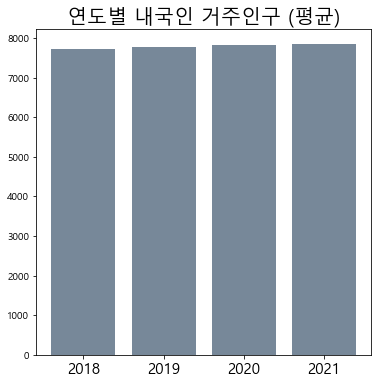

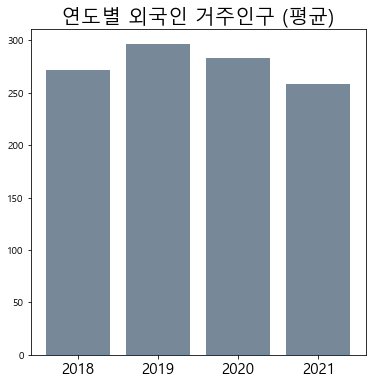

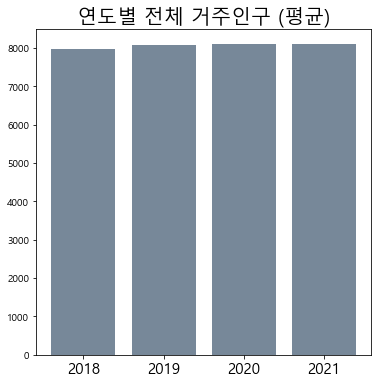

In [6]:
plt.figure(figsize=(6,6)) # figure size 정의
plt.rc('xtick',labelsize=15)
plt.title("연도별 내국인 거주인구 (평균)",fontsize=20) # 막대그래프 이름
plt.bar(res_df_y.base_year, res_df_y.resid_reg_pop,color='lightslategrey') # x축, y축 데이터와 컬러 설정
# plt.savefig('y_res.png') # png 형태로 그래프 저장

plt.figure(figsize=(6,6))
plt.rc('xtick',labelsize=15)
plt.title("연도별 외국인 거주인구 (평균)",fontsize=20)
plt.bar(res_df_y.base_year, res_df_y.foreign_pop,color='lightslategrey')
# plt.savefig('y_for.png')

plt.figure(figsize=(6,6))
plt.rc('xtick',labelsize=15)
plt.title("연도별 전체 거주인구 (평균)",fontsize=20)
plt.bar(res_df_y.base_year, res_df_y.total_pop,color='lightslategrey')
# plt.savefig('y_tot.png')

In [7]:
# 지역별 그룹화
res_df_l = res_df.groupby(['location']).sum().reset_index()
res_df_l = res_df_l.sort_values(by=['total_pop'], axis=0,ascending=False) # 거주인구 높은 순으로 정렬
res_df_l

,location,resid_reg_pop,foreign_pop,total_pop
3,노형동,2275352,91839,2367191
28,이도2동,2094712,26976,2121688
19,연동,1746570,82524,1829094
18,애월읍,1511910,43925,1555835
16,아라동,1452557,47673,1500230
31,일도2동,1420979,12596,1433575
12,삼양동,1060847,10395,1071242
41,화북동,1041665,16385,1058050
33,조천읍,1032446,24516,1056962
40,한림읍,892513,150199,1042712


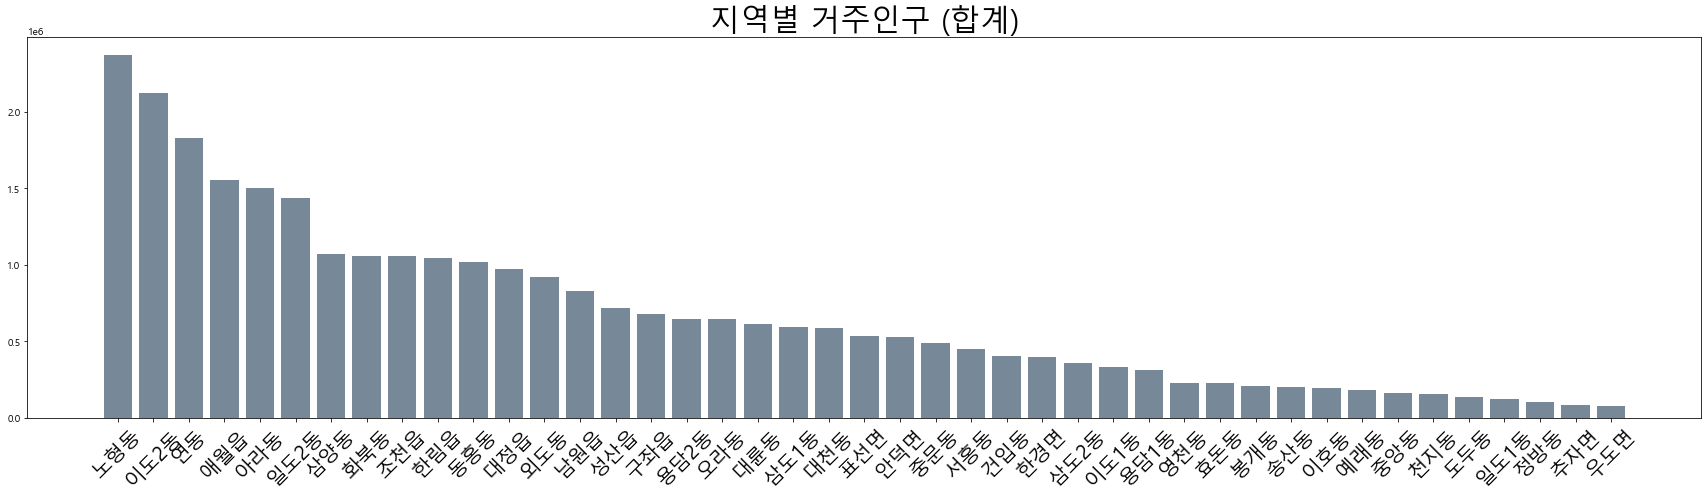

In [8]:
plt.figure(figsize=(30,7)) # figure size 정의
plt.rc('xtick',labelsize=20) # x축 라벨 글자크기 설정
plt.title("지역별 거주인구 (합계)",fontsize=30) # 막대그래프 이름 및 글자크기 설정
plt.bar(res_df_l.location, res_df_l.total_pop,color='lightslategrey') # x축, y축 데이터와 컬러 설정
plt.xticks(rotation=45) # x축 라벨 45도 회전
# plt.savefig('l_tot.png',dpi=200) # png 형태로 그래프 저장

In [9]:
# 지역별 그룹화
res_df_s = res_df.groupby(['location','sex']).sum().reset_index()
# res_df_s = res_df_s.sort_values(by=['total_pop'], axis=0,ascending=False) # 거주인구 높은 순으로 정렬
res_df_s

,location,sex,resid_reg_pop,foreign_pop,total_pop
0,건입동,남성,201854,6360,208214
1,건입동,여성,191462,3999,195461
2,구좌읍,남성,335853,17506,353359
3,구좌읍,여성,318205,8089,326294
4,남원읍,남성,409574,20485,430059
...,...,...,...,...,...
81,한림읍,여성,432888,54516,487404
82,화북동,남성,519341,9023,528364
83,화북동,여성,522324,7362,529686
84,효돈동,남성,112394,2052,114446


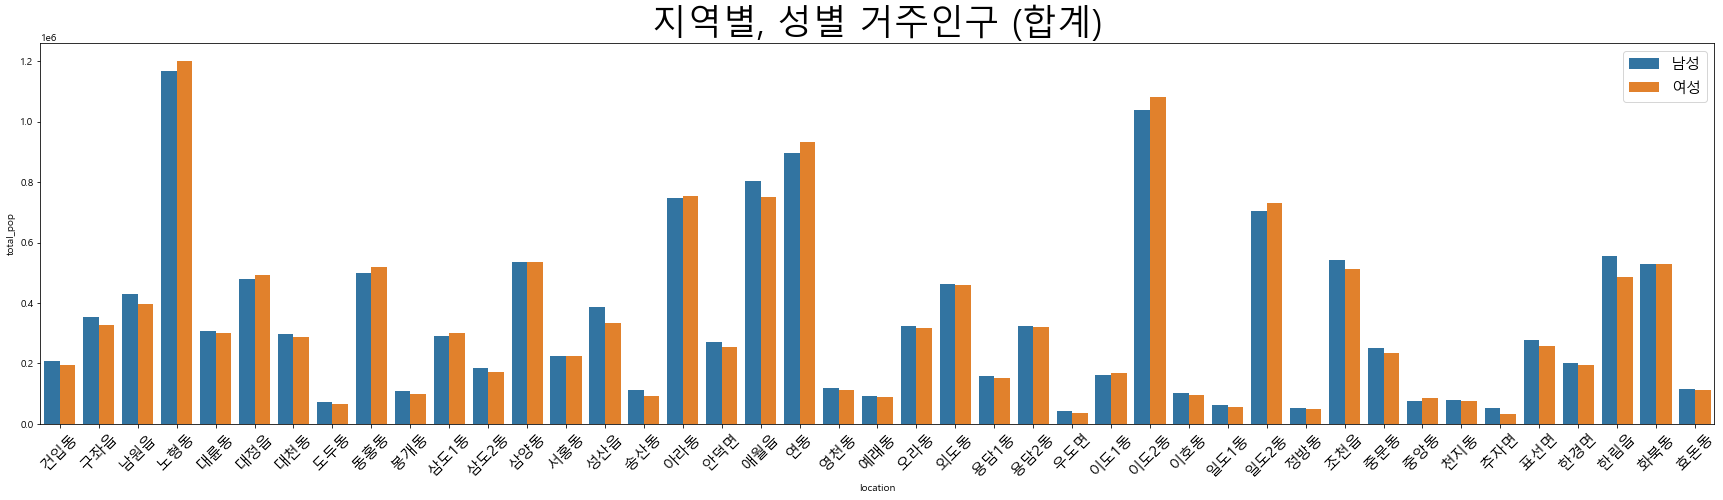

In [10]:
plt.figure(figsize=(30,7)) # figure size 정의
sns.barplot(x='location', y='total_pop', hue='sex', data=res_df_s) 
plt.title('지역별, 성별 거주인구 (합계)', fontsize=35)
plt.xticks(rotation=45,fontsize=15)
plt.legend(fontsize=15)
# plt.savefig('ls_tot.png',dpi=200)